In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SimulatedPhoton import SimulatedPhoton
from utils import reflect, refract

In [7]:
def reflect(l=[0.,0.,0.], n=[0.,0.,0.]):
  """
  Reflexión de un vector sobre un plano definido por una normal.
  
  Args:
      l (list, float): Vector a reflejar. Defaults to [0.,0.,0.].
      n (list, float): Vector normal al plano de reflexión. Defaults to [0.,0.,0.].
  
  Returns:
      list, float: Vector reflejado.
  """
  return l -2*np.dot(l,n)*n

In [ ]:
foton1 = SimulatedPhoton(1, d = np.array([0, 1, 0]))
n = np.array([1, -1, 0])
# Normaliza n con numpy
n = n / np.linalg.norm(n)
print(n)
print(foton1.get_d())
refl_dir = reflect(foton1.get_d(), n)
print(np.arccos(np.dot(refl_dir, n)))
trans_dir = refract(foton1.get_d(), n, 1, 2)
print(trans_dir)
print(np.arccos(np.dot(trans_dir, -n)))

[ 0.70710678 -0.70710678  0.        ]
[0 1 0]
0.7853981633974487
[-0.41143783  0.91143783  0.        ]
0.36136712390670817


In [15]:
def intersecion_foton_esfera(centro, radio, foton):
  """
  Calcula la intersección de una recta con una esfera.
  
  Args:
      centro (list, float): Centro de la esfera.
      radio (float): Radio de la esfera.
      origen (list, float): Origen de la recta.
      direccion (list, float): Dirección de la recta.
  
  Returns:
      list, float: Punto de intersección.
  """
  origen = foton.get_pos()
  direccion = foton.get_dir()
  l = origen - centro
  a = np.dot(direccion, direccion)
  b = 2*np.dot(l, direccion)
  c = np.dot(l, l) - radio**2
  discriminante = b**2 - 4*a*c
  if discriminante < 0:
    return [0, 0, 0], [0, 0, 0]
  t0 = (-b - np.sqrt(discriminante)) / (2*a)
  t1 = (-b + np.sqrt(discriminante)) / (2*a)
  
  if foton.get_spa() != 0:
    t = t0 if np.abs(t0) > np.abs(t1) else t1
  elif foton.get_spa() == 0:
    t = t0 if np.abs(t0) < np.abs(t1) else t1
  
  p_interseccion = origen + t*direccion
  # Vector normal a la superficie en el punto de interseccion
  n = p_interseccion - centro
  n = n / np.linalg.norm(n)
  
  return origen + t*direccion, n

[0.  1.5 0. ]


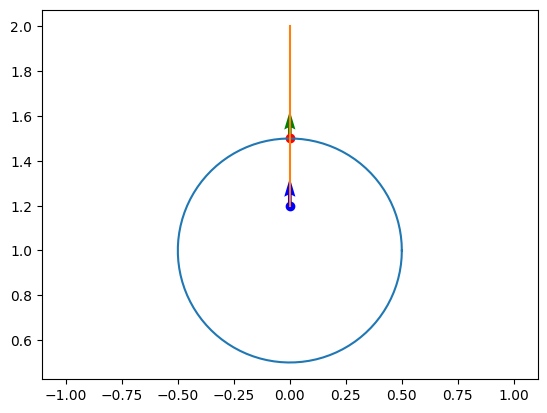

In [19]:
# Generamos una esfera de radio 0.5 y centro en el 1, 1
foton1 = SimulatedPhoton(1, pos = np.array([0, 1.2, 0]), dire = np.array([0, 1, 0]))
centro = np.array([0, 1, 0])
radio = 0.5
origen = foton1.get_pos()
direccion = foton1.get_dir()
interseccion_1, n = intersecion_foton_esfera(centro, radio, foton1)
print(interseccion_1)
# Dibujamos circunferencia (coordenadas x e y)
theta = np.linspace(0, 2*np.pi, 100)
x = centro[0] + radio*np.cos(theta)
y = centro[1] + radio*np.sin(theta)
plt.plot(x, y)
plt.xlim(-2,2)
plt.ylim(0,2)
# Same size axis
# Dibujar origen y vector de direccion
plt.scatter(origen[0], origen[1], c='b')
plt.quiver(origen[0], origen[1], direccion[0], direccion[1], color='b')
plt.quiver(interseccion_1[0], interseccion_1[1], n[0], n[1], color='g')
plt.axis('equal')
plt.plot([origen[0], 0], [origen[1], 2])
plt.scatter(interseccion_1[0], interseccion_1[1], c='r')
# plt.scatter(interseccion_2[0], interseccion_2[1], c='r')
plt.show()